# Sentiment Analysis Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns          
import re 
import tensorflow as tf
import keras

from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.preprocessing.sequence import pad_sequences

In [2]:
data = pd.read_csv('data/sentiment-analysis.csv')
data.head()

,"Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score"
0,"""I love this product!"", Positive, Twitter, 202..."
1,"""The service was terrible."", Negative, Yelp Re..."
2,"""This movie is amazing!"", Positive, IMDb, 2023..."
3,"""I'm so disappointed with their customer suppo..."
4,"""Just had the best meal of my life!"", Positive..."


In [3]:
display(data.isna().value_counts())
data = data.dropna()

Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score
False                                                                      96
True                                                                        2
Name: count, dtype: int64

In [4]:
column_names = [header.replace(' ', '') for header in data.columns[0].split(',')]
column_names

['Text',
 'Sentiment',
 'Source',
 'Date/Time',
 'UserID',
 'Location',
 'ConfidenceScore']

In [5]:
df = pd.DataFrame(columns=column_names)
df

,Text,Sentiment,Source,Date/Time,UserID,Location,ConfidenceScore


In [6]:
data

,"Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score"
0,"""I love this product!"", Positive, Twitter, 202..."
1,"""The service was terrible."", Negative, Yelp Re..."
2,"""This movie is amazing!"", Positive, IMDb, 2023..."
3,"""I'm so disappointed with their customer suppo..."
4,"""Just had the best meal of my life!"", Positive..."
...,...
91,"""Just had the most amazing vacation! I can't w..."
92,"""The food at this restaurant was awful. Never ..."
93,"""I can't stop listening to this song. It's my ..."
94,"""Their website is so confusing and poorly desi..."


In [7]:
row_values = [row.iloc[0].split(',') for _, row in data.iterrows()]

In [8]:
for row in range(0, len(row_values)):
    for ind, col_name in enumerate(column_names):
        df.at[row, col_name] = (row_values[row][ind]).lstrip()

In [9]:
df[['Date', 'Time']] = df['Date/Time'].str.split(' ', expand=True)
df.drop(['Date/Time'], axis=1, inplace=True)
df['ConfidenceScore'] = df['ConfidenceScore'].astype(float)
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, 0 to 95
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Text             96 non-null     object        
 1   Sentiment        96 non-null     object        
 2   Source           96 non-null     object        
 3   UserID           96 non-null     object        
 4   Location         96 non-null     object        
 5   ConfidenceScore  96 non-null     float64       
 6   Date             96 non-null     datetime64[ns]
 7   Time             96 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 8.8+ KB


In [15]:
df

,Text,Sentiment,Source,UserID,Location,ConfidenceScore,Date,Time
0,"""I love this product!""",Positive,Twitter,@user123,New York,0.85,2023-06-15,09:23:14
1,"""The service was terrible.""",Negative,Yelp Reviews,user456,Los Angeles,0.65,2023-06-15,11:45:32
2,"""This movie is amazing!""",Positive,IMDb,moviefan789,London,0.92,2023-06-15,14:10:22
3,"""I'm so disappointed with their customer suppo...",Negative,Online Forum,forumuser1,Toronto,0.78,2023-06-15,17:35:11
4,"""Just had the best meal of my life!""",Positive,TripAdvisor,foodie22,Paris,0.88,2023-06-16,08:50:59
...,...,...,...,...,...,...,...,...
91,"""Just had the most amazing vacation! I can't w...",Positive,TripAdvisor,travelenthusiast1,Sydney,0.93,2023-07-02,18:01:23
92,"""The food at this restaurant was awful. Never ...",Negative,Zomato,foodlover123,Mumbai,0.55,2023-07-02,20:45:37
93,"""I can't stop listening to this song. It's my ...",Positive,Spotify,musiclover789,Berlin,0.91,2023-07-03,09:17:52
94,"""Their website is so confusing and poorly desi...",Negative,Website Review,user789,Toronto,0.68,2023-07-03,11:59:18


Text(0.5, 0, 'Number of Reviews')

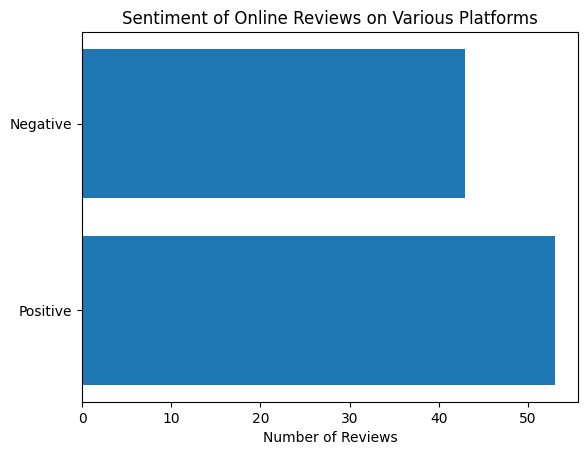

In [21]:
sentiment = df['Sentiment'].value_counts().rename_axis('Sentiment').reset_index(name='counts')
plt.barh(sentiment['Sentiment'], sentiment['counts'])
plt.title("Sentiment of Online Reviews on Various Platforms")
plt.xlabel("Number of Reviews")